In [1]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [2]:
#os.chdir("B:\\Placement Hackathon\\Rossman")

In [3]:
os.getcwd()

'C:\\Users\\ashok\\Documents\\Placement Hackathon\\Rossman'

In [211]:
#Objective:

#Data Wrangling and Exploration (treat outliers, handle missing values etc.).
#Correlation analysis with Store dataset joined.
#Training Model with RF
#Visualize and evaluate model
#Choose the best performing one and predict the next 6 weeks of sales
#The following dataset created by Rossman on its Store Sales and Information of its different drug stores:

In [212]:
#Columns       Descriptions
#Id             An Id that represents a (Store, Date) duple within the test set
#Store          A unique Id for each store
#Sales          The turnover on a given day (our target variable)
#Customers      The number of customers on a given day
#Open           open: 0 = the store is closed , 1 = the store is open
#StateHoliday   Indicates a state holiday. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
#SchoolHoliday  Store on this Date was affected or not by the closure of public schools
#StoreType      4 different stores:a,b,c,d
#Assortment      Assortment level: a = basic, b = extra, c = extended
#CompetitionDistance   Distance in meters to the nearest competitor store

In [213]:
#Having strong interest for Tree-Based models; this notebook is meant to show the performance of a robust ensemble methods ; Random Forest (parallel tree creation) and evaluate the best performing one for this case.

#first We need to  do the habitual data treatment and cleansing.

#In order to understand better the patterns of the data, i will make use of libraries like matplotlib and seaborn to deep dive cases in the dataset and give better visibility on what is happening with the different types of Rossman drug stores.

#This Exploratory analysis will help me move forward with the correlation analysis and feature engineering part of the project.

#Then i train my model using scikit-learn with Random Forest Regressor and evaluate it on a validation set in order to analyse and understand which model works best for this scenario.

In [4]:
# Reading the data

In [5]:
train = pd.read_csv("C://Users//ashok//Documents//Placement Hackathon//Rossman//train.csv", sep=',', parse_dates=['Date'],dtype={'StateHoliday': str, 'SchoolHoliday':str})

test = pd.read_csv("C://Users//ashok//Documents//Placement Hackathon//Rossman//test.csv", sep=",", index_col = 'Id', parse_dates=['Date'], dtype={'StateHoliday': str, 'SchoolHoliday':str})


#test = pd.read_csv("data/test.csv", sep=",", index_col = 'Id', parse_dates=['Date'], dtype={'StateHoliday': str, 'SchoolHoliday':str})

store = pd.read_csv("C://Users//ashok//Documents//Placement Hackathon//Rossman//store.csv", sep=",", dtype={'StoreType': str,'Assortment': str,'PromoInterval': str})         

# Data Preprocessing and EDA

In [6]:
train.shape

(1017209, 9)

In [7]:
train.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
Store            1017209 non-null int64
DayOfWeek        1017209 non-null int64
Date             1017209 non-null datetime64[ns]
Sales            1017209 non-null int64
Customers        1017209 non-null int64
Open             1017209 non-null int64
Promo            1017209 non-null int64
StateHoliday     1017209 non-null object
SchoolHoliday    1017209 non-null object
dtypes: datetime64[ns](1), int64(6), object(2)
memory usage: 69.8+ MB


In [9]:

test.shape 

(41088, 7)

In [10]:
test.describe()

,Store,DayOfWeek,Open,Promo
count,41088.000000,41088.000000,41077.000000,41088.000000
mean,555.899533,3.979167,0.854322,0.395833
std,320.274496,2.015481,0.352787,0.489035
min,1.000000,1.000000,0.000000,0.000000
25%,279.750000,2.000000,1.000000,0.000000
50%,553.500000,4.000000,1.000000,0.000000
75%,832.250000,6.000000,1.000000,1.000000
max,1115.000000,7.000000,1.000000,1.000000


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41088 entries, 1 to 41088
Data columns (total 7 columns):
Store            41088 non-null int64
DayOfWeek        41088 non-null int64
Date             41088 non-null datetime64[ns]
Open             41077 non-null float64
Promo            41088 non-null int64
StateHoliday     41088 non-null object
SchoolHoliday    41088 non-null object
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 2.5+ MB


In [12]:
store.shape 

(1115, 10)

In [13]:
store.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [14]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
Store                        1115 non-null int64
StoreType                    1115 non-null object
Assortment                   1115 non-null object
CompetitionDistance          1112 non-null float64
CompetitionOpenSinceMonth    761 non-null float64
CompetitionOpenSinceYear     761 non-null float64
Promo2                       1115 non-null int64
Promo2SinceWeek              571 non-null float64
Promo2SinceYear              571 non-null float64
PromoInterval                571 non-null object
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [15]:
#Train data inspect 

In [16]:
print(train.head())

   Store  DayOfWeek       Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5 2015-07-31   5263        555     1      1            0   
1      2          5 2015-07-31   6064        625     1      1            0   
2      3          5 2015-07-31   8314        821     1      1            0   
3      4          5 2015-07-31  13995       1498     1      1            0   
4      5          5 2015-07-31   4822        559     1      1            0   

  SchoolHoliday  
0             1  
1             1  
2             1  
3             1  
4             1  


In [17]:
#From the above train data set we can see that , sales will be out target and prediction, 
#open == storem open on particual day or not 
#state holiday on particual day on that store  or not 
#school holiday on particual day on that store or not 
#promo has be done for that store or not

In [18]:
print(train.tail())

         Store  DayOfWeek       Date  Sales  Customers  Open  Promo  \
1017204   1111          2 2013-01-01      0          0     0      0   
1017205   1112          2 2013-01-01      0          0     0      0   
1017206   1113          2 2013-01-01      0          0     0      0   
1017207   1114          2 2013-01-01      0          0     0      0   
1017208   1115          2 2013-01-01      0          0     0      0   

        StateHoliday SchoolHoliday  
1017204            a             1  
1017205            a             1  
1017206            a             1  
1017207            a             1  
1017208            a             1  


In [19]:
# Seems the there won't be any average sales on the closed day of store 

In [20]:
train.loc[train['Open'] == 0, 'Sales'].mean()

0.0

In [21]:
# Lets observe the seasoal sales as per year ans month 
# Creating two new colums of year and month using datetime function

In [22]:
train['Year'] = pd.DatetimeIndex(train['Date']).year
train['Month'] = pd.DatetimeIndex(train['Date']).month

In [23]:
# organising the train data in with newly created columns
train = train[['Store', 'DayOfWeek', 'Date', 'Year', 'Month', 'Customers', 'Open','Promo', 'StateHoliday', 'SchoolHoliday', 'Sales']]

In [24]:
list(train.columns.values) # verifying 

['Store',
 'DayOfWeek',
 'Date',
 'Year',
 'Month',
 'Customers',
 'Open',
 'Promo',
 'StateHoliday',
 'SchoolHoliday',
 'Sales']

In [25]:
print(train)

         Store  DayOfWeek       Date  Year  Month  Customers  Open  Promo  \
0            1          5 2015-07-31  2015      7        555     1      1   
1            2          5 2015-07-31  2015      7        625     1      1   
2            3          5 2015-07-31  2015      7        821     1      1   
3            4          5 2015-07-31  2015      7       1498     1      1   
4            5          5 2015-07-31  2015      7        559     1      1   
...        ...        ...        ...   ...    ...        ...   ...    ...   
1017204   1111          2 2013-01-01  2013      1          0     0      0   
1017205   1112          2 2013-01-01  2013      1          0     0      0   
1017206   1113          2 2013-01-01  2013      1          0     0      0   
1017207   1114          2 2013-01-01  2013      1          0     0      0   
1017208   1115          2 2013-01-01  2013      1          0     0      0   

        StateHoliday SchoolHoliday  Sales  
0                  0           

In [26]:
train.dtypes

Store                     int64
DayOfWeek                 int64
Date             datetime64[ns]
Year                      int64
Month                     int64
Customers                 int64
Open                      int64
Promo                     int64
StateHoliday             object
SchoolHoliday            object
Sales                     int64
dtype: object

In [27]:
train['StateHoliday'].unique()

array(['0', 'a', 'b', 'c'], dtype=object)

In [28]:
train.iloc[:,8]

0          0
1          0
2          0
3          0
4          0
          ..
1017204    a
1017205    a
1017206    a
1017207    a
1017208    a
Name: StateHoliday, Length: 1017209, dtype: object

In [29]:
# Dummification of Stateholiday 

In [30]:
#from sklearn.preprocessing import OneHotEncoder
#onehotencoder = OneHotEncoder(categorical_features=[8])
#train = onehotencoder.fit_transform(train.loc[8]).toarray()

In [31]:
from sklearn.preprocessing import LabelEncoder 
labencdr_t = LabelEncoder()
train.iloc[:,8] = labencdr_t.fit_transform(train.iloc[:,8])

In [32]:
train

,Store,DayOfWeek,Date,Year,Month,Customers,Open,Promo,StateHoliday,SchoolHoliday,Sales
0,1,5,2015-07-31,2015,7,555,1,1,0,1,5263
1,2,5,2015-07-31,2015,7,625,1,1,0,1,6064
2,3,5,2015-07-31,2015,7,821,1,1,0,1,8314
3,4,5,2015-07-31,2015,7,1498,1,1,0,1,13995
4,5,5,2015-07-31,2015,7,559,1,1,0,1,4822
...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,2013,1,0,0,0,1,1,0
1017205,1112,2,2013-01-01,2013,1,0,0,0,1,1,0
1017206,1113,2,2013-01-01,2013,1,0,0,0,1,1,0
1017207,1114,2,2013-01-01,2013,1,0,0,0,1,1,0


In [33]:
# Checking values of school holiday 

In [34]:
train['SchoolHoliday'].unique()

array(['1', '0'], dtype=object)

In [35]:
#object to integer conversion

In [36]:
train['SchoolHoliday'] = train['SchoolHoliday'].astype(int)

In [37]:
# recheck the data frame 

In [38]:
train.dtypes

Store                     int64
DayOfWeek                 int64
Date             datetime64[ns]
Year                      int64
Month                     int64
Customers                 int64
Open                      int64
Promo                     int64
StateHoliday              int32
SchoolHoliday             int32
Sales                     int64
dtype: object

In [39]:
print(train.describe())

              Store     DayOfWeek          Year         Month     Customers  \
count  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06   
mean   5.584297e+02  3.998341e+00  2.013832e+03  5.846762e+00  6.331459e+02   
std    3.219087e+02  1.997391e+00  7.773960e-01  3.326097e+00  4.644117e+02   
min    1.000000e+00  1.000000e+00  2.013000e+03  1.000000e+00  0.000000e+00   
25%    2.800000e+02  2.000000e+00  2.013000e+03  3.000000e+00  4.050000e+02   
50%    5.580000e+02  4.000000e+00  2.014000e+03  6.000000e+00  6.090000e+02   
75%    8.380000e+02  6.000000e+00  2.014000e+03  8.000000e+00  8.370000e+02   
max    1.115000e+03  7.000000e+00  2.015000e+03  1.200000e+01  7.388000e+03   

               Open         Promo  StateHoliday  SchoolHoliday         Sales  
count  1.017209e+06  1.017209e+06  1.017209e+06   1.017209e+06  1.017209e+06  
mean   8.301067e-01  3.815145e-01  4.516279e-02   1.786467e-01  5.773819e+03  
std    3.755392e-01  4.857586e-01  2.836559e-01   3

In [40]:
# checking values of open attribute 

In [41]:
train["Open"].unique()

array([1, 0], dtype=int64)

In [42]:
#Filtering the columns for training data

In [43]:
train = train[['Store', 'DayOfWeek', 'Date', 'Year', 'Month', 'Customers', 'Open','Promo', 'StateHoliday', 'SchoolHoliday', 'Sales']]
list(train.columns.values)

['Store',
 'DayOfWeek',
 'Date',
 'Year',
 'Month',
 'Customers',
 'Open',
 'Promo',
 'StateHoliday',
 'SchoolHoliday',
 'Sales']

In [44]:
#Checking missing values or Nan values 

In [45]:
print("NaNs for individual columns")
print("---------------------------")
#using lambda function
from collections import Counter
nan = {colname : train[colname].isnull().sum() for colname in train.columns}
Counter(nan).most_common()

NaNs for individual columns
---------------------------


[('Store', 0),
 ('DayOfWeek', 0),
 ('Date', 0),
 ('Year', 0),
 ('Month', 0),
 ('Customers', 0),
 ('Open', 0),
 ('Promo', 0),
 ('StateHoliday', 0),
 ('SchoolHoliday', 0),
 ('Sales', 0)]

In [46]:
# correlation check for visuvalize 
corl = pd.DataFrame(train.loc[:, ['DayOfWeek', 'Sales', 'Month', 'Year', 'Customers', 'Promo',
                                    'StateHoliday', 'SchoolHoliday']].corr())
print(corl)

               DayOfWeek     Sales     Month      Year  Customers     Promo  \
DayOfWeek       1.000000 -0.462125 -0.005362  0.001937  -0.386445 -0.392925   
Sales          -0.462125  1.000000  0.048768  0.023519   0.894711  0.452345   
Month          -0.005362  0.048768  1.000000 -0.269382   0.038179 -0.011747   
Year            0.001937  0.023519 -0.269382  1.000000  -0.001212  0.024300   
Customers      -0.386445  0.894711  0.038179 -0.001212   1.000000  0.316169   
Promo          -0.392925  0.452345 -0.011747  0.024300   0.316169  1.000000   
StateHoliday   -0.044265 -0.229029  0.038058 -0.005067  -0.204295 -0.024157   
SchoolHoliday  -0.205388  0.085124  0.103282 -0.036535   0.071568  0.067483   

               StateHoliday  SchoolHoliday  
DayOfWeek         -0.044265      -0.205388  
Sales             -0.229029       0.085124  
Month              0.038058       0.103282  
Year              -0.005067      -0.036535  
Customers         -0.204295       0.071568  
Promo             

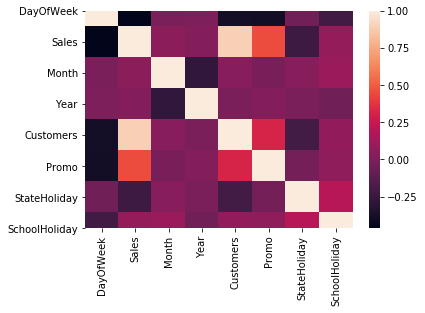

In [47]:
sns.heatmap(data=corl)
plt.show()

In [48]:
# Test Data Examine 

In [49]:
test.shape

(41088, 7)

In [50]:
print(test)

       Store  DayOfWeek       Date  Open  Promo StateHoliday SchoolHoliday
Id                                                                        
1          1          4 2015-09-17   1.0      1            0             0
2          3          4 2015-09-17   1.0      1            0             0
3          7          4 2015-09-17   1.0      1            0             0
4          8          4 2015-09-17   1.0      1            0             0
5          9          4 2015-09-17   1.0      1            0             0
...      ...        ...        ...   ...    ...          ...           ...
41084   1111          6 2015-08-01   1.0      0            0             0
41085   1112          6 2015-08-01   1.0      0            0             0
41086   1113          6 2015-08-01   1.0      0            0             0
41087   1114          6 2015-08-01   1.0      0            0             0
41088   1115          6 2015-08-01   1.0      0            0             1

[41088 rows x 7 columns]

In [51]:
test['Year'] = pd.DatetimeIndex(test['Date']).year
test['Month'] = pd.DatetimeIndex(test['Date']).month

In [52]:
print(test.head())

    Store  DayOfWeek       Date  Open  Promo StateHoliday SchoolHoliday  Year  \
Id                                                                              
1       1          4 2015-09-17   1.0      1            0             0  2015   
2       3          4 2015-09-17   1.0      1            0             0  2015   
3       7          4 2015-09-17   1.0      1            0             0  2015   
4       8          4 2015-09-17   1.0      1            0             0  2015   
5       9          4 2015-09-17   1.0      1            0             0  2015   

    Month  
Id         
1       9  
2       9  
3       9  
4       9  
5       9  


In [53]:
# Checking closed store info in test data 

In [54]:
sum(test['Open'] == 0)

5984

In [55]:
test = test[['Store', 'DayOfWeek', 'Date', 'Year', 'Month', 'Open','Promo', 'StateHoliday', 'SchoolHoliday']]
list(test.columns.values)

['Store',
 'DayOfWeek',
 'Date',
 'Year',
 'Month',
 'Open',
 'Promo',
 'StateHoliday',
 'SchoolHoliday']

In [56]:
#an over view of final test data 

In [57]:
print(test)

       Store  DayOfWeek       Date  Year  Month  Open  Promo StateHoliday  \
Id                                                                          
1          1          4 2015-09-17  2015      9   1.0      1            0   
2          3          4 2015-09-17  2015      9   1.0      1            0   
3          7          4 2015-09-17  2015      9   1.0      1            0   
4          8          4 2015-09-17  2015      9   1.0      1            0   
5          9          4 2015-09-17  2015      9   1.0      1            0   
...      ...        ...        ...   ...    ...   ...    ...          ...   
41084   1111          6 2015-08-01  2015      8   1.0      0            0   
41085   1112          6 2015-08-01  2015      8   1.0      0            0   
41086   1113          6 2015-08-01  2015      8   1.0      0            0   
41087   1114          6 2015-08-01  2015      8   1.0      0            0   
41088   1115          6 2015-08-01  2015      8   1.0      0            0   

In [58]:
# checking missing values 

In [59]:
print("NANs for individual columns")
print("---------------------------")
from collections import Counter
nant = {colname : test[colname].isnull().sum() for colname in test.columns}
Counter(nant).most_common()

NANs for individual columns
---------------------------


[('Open', 11),
 ('Store', 0),
 ('DayOfWeek', 0),
 ('Date', 0),
 ('Year', 0),
 ('Month', 0),
 ('Promo', 0),
 ('StateHoliday', 0),
 ('SchoolHoliday', 0)]

In [60]:
# seems to be having 11 missing values 

In [61]:
print(test.loc[np.isnan(test["Open"])]) # the eleven missing datas 

       Store  DayOfWeek       Date  Year  Month  Open  Promo StateHoliday  \
Id                                                                          
480      622          4 2015-09-17  2015      9   NaN      1            0   
1336     622          3 2015-09-16  2015      9   NaN      1            0   
2192     622          2 2015-09-15  2015      9   NaN      1            0   
3048     622          1 2015-09-14  2015      9   NaN      1            0   
4760     622          6 2015-09-12  2015      9   NaN      0            0   
5616     622          5 2015-09-11  2015      9   NaN      0            0   
6472     622          4 2015-09-10  2015      9   NaN      0            0   
7328     622          3 2015-09-09  2015      9   NaN      0            0   
8184     622          2 2015-09-08  2015      9   NaN      0            0   
9040     622          1 2015-09-07  2015      9   NaN      0            0   
10752    622          6 2015-09-05  2015      9   NaN      0            0   

In [62]:
# the store ID 622 seems to be closed some specific days of september of 2015

In [63]:
# lets check with train and compare 

In [64]:
print(train.loc[train["Store"]== 622].head())

      Store  DayOfWeek       Date  Year  Month  Customers  Open  Promo  \
621     622          5 2015-07-31  2015      7        540     1      1   
1736    622          4 2015-07-30  2015      7        406     1      1   
2851    622          3 2015-07-29  2015      7        468     1      1   
3966    622          2 2015-07-28  2015      7        417     1      1   
5081    622          1 2015-07-27  2015      7        517     1      1   

      StateHoliday  SchoolHoliday  Sales  
621              0              1   6306  
1736             0              1   5412  
2851             0              1   5326  
3966             0              1   4966  
5081             0              1   5413  


In [65]:
#to avoid information loss,, we should be catious, so we see the train data of store 622 ha infor, so lets label in test as well

In [66]:
test.loc[np.isnan(test['Open']), 'Open'] = 1

In [67]:
#recheckin with filing up the missing values 

In [68]:
print("NANs for individual columns")
print("---------------------------")
from collections import Counter
nant = {colname : test[colname].isnull().sum() for colname in test.columns}
Counter(nant).most_common()

NANs for individual columns
---------------------------


[('Store', 0),
 ('DayOfWeek', 0),
 ('Date', 0),
 ('Year', 0),
 ('Month', 0),
 ('Open', 0),
 ('Promo', 0),
 ('StateHoliday', 0),
 ('SchoolHoliday', 0)]

In [69]:
#removed nan from test as well

In [70]:
test.dtypes

Store                     int64
DayOfWeek                 int64
Date             datetime64[ns]
Year                      int64
Month                     int64
Open                    float64
Promo                     int64
StateHoliday             object
SchoolHoliday            object
dtype: object

In [71]:
test['StateHoliday'].unique()

array(['0', 'a'], dtype=object)

In [72]:
# only one state holiday in test 

In [73]:
test['SchoolHoliday'].unique()

array(['0', '1'], dtype=object)

In [74]:
from sklearn.preprocessing import LabelEncoder 
labencdr_ts = LabelEncoder()
test.iloc[:,7] = labencdr_ts.fit_transform(test.iloc[:,7])

In [75]:
print(test)

       Store  DayOfWeek       Date  Year  Month  Open  Promo  StateHoliday  \
Id                                                                           
1          1          4 2015-09-17  2015      9   1.0      1             0   
2          3          4 2015-09-17  2015      9   1.0      1             0   
3          7          4 2015-09-17  2015      9   1.0      1             0   
4          8          4 2015-09-17  2015      9   1.0      1             0   
5          9          4 2015-09-17  2015      9   1.0      1             0   
...      ...        ...        ...   ...    ...   ...    ...           ...   
41084   1111          6 2015-08-01  2015      8   1.0      0             0   
41085   1112          6 2015-08-01  2015      8   1.0      0             0   
41086   1113          6 2015-08-01  2015      8   1.0      0             0   
41087   1114          6 2015-08-01  2015      8   1.0      0             0   
41088   1115          6 2015-08-01  2015      8   1.0      0    

In [76]:
test['StateHoliday'].unique()

array([0, 1], dtype=int64)

In [77]:
test['StateHoliday'] = test['StateHoliday'].astype(int)
test['SchoolHoliday'] = test['SchoolHoliday'].astype(int)

In [78]:
test['StateHoliday'].unique()

array([0, 1], dtype=int64)

In [79]:
test['SchoolHoliday'].unique()

array([0, 1], dtype=int64)

In [80]:
#converted both the columns in to data columns in to integer

In [81]:
#Because only StateHoliday 0 and 1 exist in test dataset, we should consider deleting the rows in train dataset that the StateHoliday value is different than 0 or 1

In [82]:
train.loc[train['StateHoliday'] > 1].shape

(10790, 11)

In [83]:
train = train.loc[train['StateHoliday'] < 2]

In [84]:
train

,Store,DayOfWeek,Date,Year,Month,Customers,Open,Promo,StateHoliday,SchoolHoliday,Sales
0,1,5,2015-07-31,2015,7,555,1,1,0,1,5263
1,2,5,2015-07-31,2015,7,625,1,1,0,1,6064
2,3,5,2015-07-31,2015,7,821,1,1,0,1,8314
3,4,5,2015-07-31,2015,7,1498,1,1,0,1,13995
4,5,5,2015-07-31,2015,7,559,1,1,0,1,4822
...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,2013,1,0,0,0,1,1,0
1017205,1112,2,2013-01-01,2013,1,0,0,0,1,1,0
1017206,1113,2,2013-01-01,2013,1,0,0,0,1,1,0
1017207,1114,2,2013-01-01,2013,1,0,0,0,1,1,0


In [85]:
#The Store data Exploration 

In [86]:
store.shape

(1115, 10)

In [87]:
print(store.head())

   Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2007.0       1             13.0           2010.0   
2                    2006.0       1             14.0           2011.0   
3                    2009.0       0              NaN              NaN   
4                    2015.0       0              NaN              NaN   

     PromoInterval  
0              NaN  
1  Jan,Apr,Jul,Oct  
2  Jan,Apr,

In [88]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
Store                        1115 non-null int64
StoreType                    1115 non-null object
Assortment                   1115 non-null object
CompetitionDistance          1112 non-null float64
CompetitionOpenSinceMonth    761 non-null float64
CompetitionOpenSinceYear     761 non-null float64
Promo2                       1115 non-null int64
Promo2SinceWeek              571 non-null float64
Promo2SinceYear              571 non-null float64
PromoInterval                571 non-null object
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [89]:
#the store data has assormnt , promotional details ,

In [90]:
store.tail()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [91]:
print("NaNs for individual columns")
print("---------------------------")
from collections import Counter
nans = {colname : store[colname].isnull().sum() for colname in store.columns}
Counter(nans).most_common()

NaNs for individual columns
---------------------------


[('Promo2SinceWeek', 544),
 ('Promo2SinceYear', 544),
 ('PromoInterval', 544),
 ('CompetitionOpenSinceMonth', 354),
 ('CompetitionOpenSinceYear', 354),
 ('CompetitionDistance', 3),
 ('Store', 0),
 ('StoreType', 0),
 ('Assortment', 0),
 ('Promo2', 0)]

In [92]:
#seems the following attributes like promo2SinceWeek, Promo2Interval, Promo2SinceYear, CompetitionOpenSinceMonth, CompetitionOpenSinceYear and CompetitionDistance have missing values and need to impute withe loaded libraries for missing values

In [93]:
store['PromoInterval'].unique()

array([nan, 'Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec'],
      dtype=object)

In [94]:
store.loc[store['Promo2'] == 0, ['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']] = 0

In [95]:
store.loc[store['Promo2'] != 0, 'Promo2SinceWeek'] = store['Promo2SinceWeek'].max() - store.loc[store['Promo2'] != 0, 'Promo2SinceWeek']

In [96]:
store.loc[store['Promo2'] != 0, 'Promo2SinceYear'] = store['Promo2SinceYear'].max() - store.loc[store['Promo2'] != 0, 'Promo2SinceYear']

In [97]:
store["PromoInterval"].unique()

array([0, 'Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec'],
      dtype=object)

In [98]:
store["PromoInterval"] = store["PromoInterval"].astype(str)

In [99]:
from sklearn.preprocessing import LabelEncoder 
labencdr_s = LabelEncoder()
store.iloc[:,9] = labencdr_s.fit_transform(store.iloc[:,9])

In [100]:
store

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,a,a,570.0,11.0,2007.0,1,37.0,5.0,2
2,3,a,a,14130.0,12.0,2006.0,1,36.0,4.0,2
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,19.0,2.0,2
1111,1112,c,c,1880.0,4.0,2006.0,0,0.0,0.0,0
1112,1113,a,c,9260.0,NaN,NaN,0,0.0,0.0,0
1113,1114,a,c,870.0,NaN,NaN,0,0.0,0.0,0


In [101]:
store["PromoInterval"] = store["PromoInterval"].astype(int)

In [102]:
print(store.head())

   Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              0.0              0.0   
1                    2007.0       1             37.0              5.0   
2                    2006.0       1             36.0              4.0   
3                    2009.0       0              0.0              0.0   
4                    2015.0       0              0.0              0.0   

   PromoInterval  
0              0  
1              2  
2              2 

In [103]:
store.dtypes

Store                          int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                  int32
dtype: object

In [104]:
from sklearn.preprocessing import LabelEncoder 
labencdr_ts = LabelEncoder()
store.iloc[:,1] = labencdr_ts.fit_transform(store.iloc[:,1])

In [105]:
from sklearn.preprocessing import LabelEncoder 
labencdr_ts = LabelEncoder()
store.iloc[:,2] = labencdr_ts.fit_transform(store.iloc[:,2])

In [106]:
print(store.head())

   Store  StoreType  Assortment  CompetitionDistance  \
0      1          2           0               1270.0   
1      2          0           0                570.0   
2      3          0           0              14130.0   
3      4          2           2                620.0   
4      5          0           0              29910.0   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                        9.0                    2008.0       0   
1                       11.0                    2007.0       1   
2                       12.0                    2006.0       1   
3                        9.0                    2009.0       0   
4                        4.0                    2015.0       0   

   Promo2SinceWeek  Promo2SinceYear  PromoInterval  
0              0.0              0.0              0  
1             37.0              5.0              2  
2             36.0              4.0              2  
3              0.0              0.0              0  
4

In [107]:
#Checking missing values

In [108]:
print("NaNs for individual columns")
print("---------------------------")
from collections import Counter
nanss = {colname : store[colname].isnull().sum() for colname in store.columns}
Counter(nanss).most_common()

NaNs for individual columns
---------------------------


[('CompetitionOpenSinceMonth', 354),
 ('CompetitionOpenSinceYear', 354),
 ('CompetitionDistance', 3),
 ('Store', 0),
 ('StoreType', 0),
 ('Assortment', 0),
 ('Promo2', 0),
 ('Promo2SinceWeek', 0),
 ('Promo2SinceYear', 0),
 ('PromoInterval', 0)]

In [109]:
# Imputing the missing values 

In [110]:
from sklearn.preprocessing import Imputer
imputer = Imputer().fit(store)
store_imputed = imputer.transform(store)

C:\Users\ashok\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [111]:
store2 = pd.DataFrame(store_imputed, columns=store.columns.values)

In [112]:
#verifying the values imputed 

In [113]:
print("NANs for individual columns")
print("---------------------------")
from collections import Counter
x = {colname : store2[colname].isnull().sum() for colname in store2.columns}
Counter(x).most_common()

NANs for individual columns
---------------------------


[('Store', 0),
 ('StoreType', 0),
 ('Assortment', 0),
 ('CompetitionDistance', 0),
 ('CompetitionOpenSinceMonth', 0),
 ('CompetitionOpenSinceYear', 0),
 ('Promo2', 0),
 ('Promo2SinceWeek', 0),
 ('Promo2SinceYear', 0),
 ('PromoInterval', 0)]

In [114]:
store2.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1.0,2.0,0.0,1270.0,9.0,2008.0,0.0,0.0,0.0,0.0
1,2.0,0.0,0.0,570.0,11.0,2007.0,1.0,37.0,5.0,2.0
2,3.0,0.0,0.0,14130.0,12.0,2006.0,1.0,36.0,4.0,2.0
3,4.0,2.0,2.0,620.0,9.0,2009.0,0.0,0.0,0.0,0.0
4,5.0,0.0,0.0,29910.0,4.0,2015.0,0.0,0.0,0.0,0.0


In [115]:
store2['CompetitionOpenSinceMonth'] = store2['CompetitionOpenSinceMonth'].max() - store2['CompetitionOpenSinceMonth']

In [116]:
store2['CompetitionOpenSinceYear'] = store2['CompetitionOpenSinceYear'].max() - store2['CompetitionOpenSinceYear']

In [117]:
store2.tail()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111.0,0.0,0.0,1900.0,6.000000,1.000000,1.0,19.0,2.0,2.0
1111,1112.0,2.0,2.0,1880.0,8.000000,9.000000,0.0,0.0,0.0,0.0
1112,1113.0,0.0,2.0,9260.0,4.775296,6.331143,0.0,0.0,0.0,0.0
1113,1114.0,0.0,2.0,870.0,4.775296,6.331143,0.0,0.0,0.0,0.0
1114,1115.0,3.0,2.0,5350.0,4.775296,6.331143,1.0,28.0,3.0,3.0


In [118]:
store2.astype(int)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,2,0,1270,3,7,0,0,0,0
1,2,0,0,570,1,8,1,37,5,2
2,3,0,0,14130,0,9,1,36,4,2
3,4,2,2,620,3,6,0,0,0,0
4,5,0,0,29910,8,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1110,1111,0,0,1900,6,1,1,19,2,2
1111,1112,2,2,1880,8,9,0,0,0,0
1112,1113,0,2,9260,4,6,0,0,0,0
1113,1114,0,2,870,4,6,0,0,0,0


In [119]:
#checking wether the store column is similar in store and train data 

In [120]:
len(store2['Store']) - sum(store2['Store'].isin(train['Store']))

0

In [121]:
# Checking if there are additional (unnecessary) stores in "train" data.
# No difference at all!

In [122]:
StoreStore = pd.Series(store2['Store'])
StoreTrain = pd.Series(train['Store'])
sum(StoreTrain.isin(StoreStore) == False)

0

In [123]:
#since bothe the store data in store and train are similar make the merge easier 
#now merge train and store before modeling 

In [124]:
train_store = pd.merge(train, store2, how = 'left', on='Store')

In [125]:
print(train_store.head())

   Store  DayOfWeek       Date  Year  Month  Customers  Open  Promo  \
0      1          5 2015-07-31  2015      7        555     1      1   
1      2          5 2015-07-31  2015      7        625     1      1   
2      3          5 2015-07-31  2015      7        821     1      1   
3      4          5 2015-07-31  2015      7       1498     1      1   
4      5          5 2015-07-31  2015      7        559     1      1   

   StateHoliday  SchoolHoliday  Sales  StoreType  Assortment  \
0             0              1   5263        2.0         0.0   
1             0              1   6064        0.0         0.0   
2             0              1   8314        0.0         0.0   
3             0              1  13995        2.0         2.0   
4             0              1   4822        0.0         0.0   

   CompetitionDistance  CompetitionOpenSinceMonth  CompetitionOpenSinceYear  \
0               1270.0                        3.0                       7.0   
1                570.0        

In [126]:
print(train_store.tail())

         Store  DayOfWeek       Date  Year  Month  Customers  Open  Promo  \
1006414   1111          2 2013-01-01  2013      1          0     0      0   
1006415   1112          2 2013-01-01  2013      1          0     0      0   
1006416   1113          2 2013-01-01  2013      1          0     0      0   
1006417   1114          2 2013-01-01  2013      1          0     0      0   
1006418   1115          2 2013-01-01  2013      1          0     0      0   

         StateHoliday  SchoolHoliday  Sales  StoreType  Assortment  \
1006414             1              1      0        0.0         0.0   
1006415             1              1      0        2.0         2.0   
1006416             1              1      0        0.0         2.0   
1006417             1              1      0        0.0         2.0   
1006418             1              1      0        3.0         2.0   

         CompetitionDistance  CompetitionOpenSinceMonth  \
1006414               1900.0                   6.000000  

In [127]:
# now merge test and store data similarly 

In [128]:
test_store = test.reset_index().merge(store2, how = 'left', on='Store').set_index('Id')

In [129]:
print(test_store.head())

    Store  DayOfWeek       Date  Year  Month  Open  Promo  StateHoliday  \
Id                                                                        
1       1          4 2015-09-17  2015      9   1.0      1             0   
2       3          4 2015-09-17  2015      9   1.0      1             0   
3       7          4 2015-09-17  2015      9   1.0      1             0   
4       8          4 2015-09-17  2015      9   1.0      1             0   
5       9          4 2015-09-17  2015      9   1.0      1             0   

    SchoolHoliday  StoreType  Assortment  CompetitionDistance  \
Id                                                              
1               0        2.0         0.0               1270.0   
2               0        0.0         0.0              14130.0   
3               0        0.0         2.0              24000.0   
4               0        0.0         0.0               7520.0   
5               0        0.0         2.0               2030.0   

    CompetitionOpe

In [130]:
test_store.shape

(41088, 18)

In [131]:
test_store.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Year                         0
Month                        0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

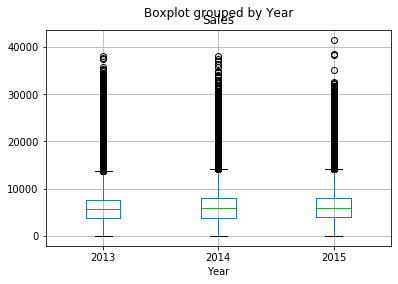

In [132]:
train_store.boxplot(column='Sales', by='Year')
plt.show()

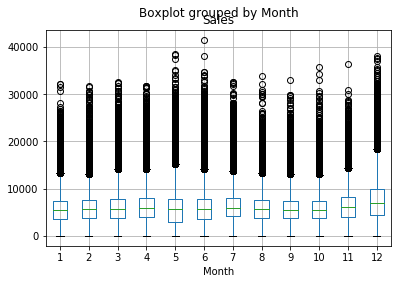

In [133]:
train_store.boxplot(column='Sales', by='Month')
plt.show()

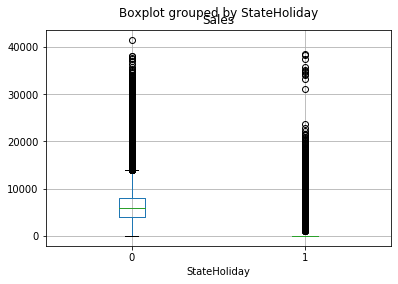

In [134]:
train_store.boxplot(column='Sales', by='StateHoliday')
plt.show()

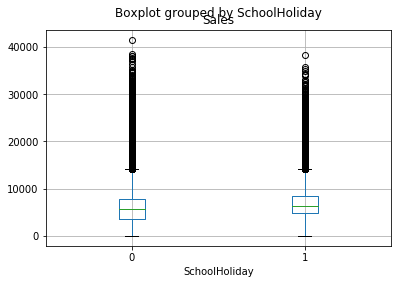

In [135]:
train_store.boxplot(column='Sales', by='SchoolHoliday')
plt.show()

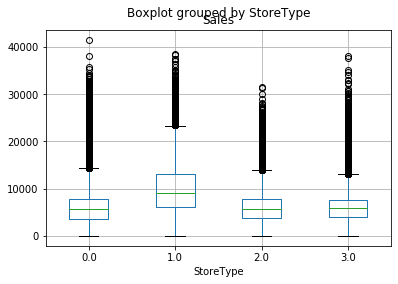

In [136]:
train_store.boxplot(column='Sales', by='StoreType')
plt.show()

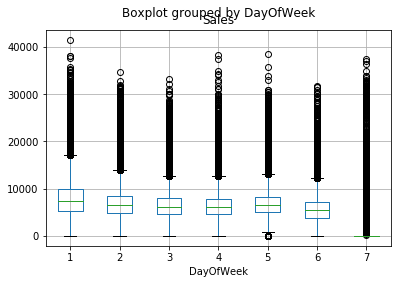

In [137]:
train_store.boxplot(column='Sales', by='DayOfWeek')
plt.show()

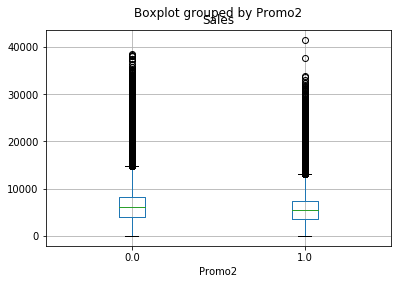

In [138]:
train_store.boxplot(column='Sales', by='Promo2')
plt.show()

In [139]:
#train_store.ix[train2['Promo2'] != 0].boxplot(column='Sales', by='Promo2SinceYear')
#plt.show()

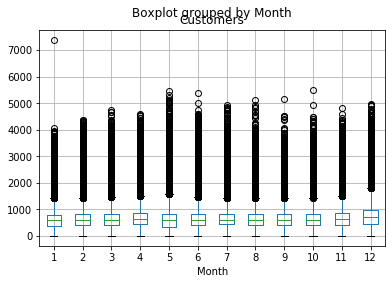

In [140]:
train_store.boxplot(column='Customers', by='Month')
plt.show()

In [141]:
#train_store.ix[train2['Promo2'] != 0].boxplot(column='Sales', by='PromoInterval')
#plt.show()

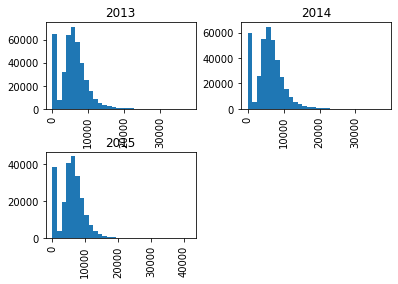

In [142]:
train_store.hist(column='Sales', by='Year', bins=30)
plt.show()

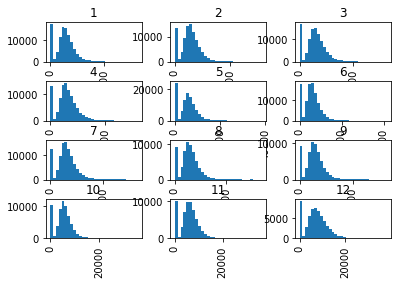

In [143]:
train_store.hist(column='Sales', by='Month', bins=30)
plt.show()

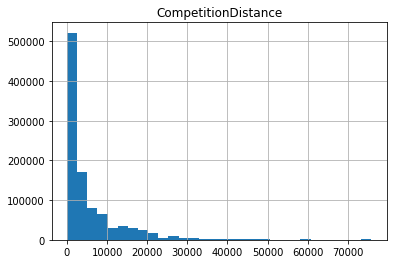

In [144]:
train_store.hist(column='CompetitionDistance', bins=30)
plt.show()

In [145]:
# Modelling 

In [146]:
#Trainig the data 
train_store.columns.values

array(['Store', 'DayOfWeek', 'Date', 'Year', 'Month', 'Customers', 'Open',
       'Promo', 'StateHoliday', 'SchoolHoliday', 'Sales', 'StoreType',
       'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'], dtype=object)

In [147]:
train_model = train_store.drop(['Customers', 'Date'], axis=1)
train_model['Year'] = train_model['Year'].max() - train_model['Year']
print(train_model.head())

   Store  DayOfWeek  Year  Month  Open  Promo  StateHoliday  SchoolHoliday  \
0      1          5     0      7     1      1             0              1   
1      2          5     0      7     1      1             0              1   
2      3          5     0      7     1      1             0              1   
3      4          5     0      7     1      1             0              1   
4      5          5     0      7     1      1             0              1   

   Sales  StoreType  Assortment  CompetitionDistance  \
0   5263        2.0         0.0               1270.0   
1   6064        0.0         0.0                570.0   
2   8314        0.0         0.0              14130.0   
3  13995        2.0         2.0                620.0   
4   4822        0.0         0.0              29910.0   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                        3.0                       7.0     0.0   
1                        1.0                       8.0     1.0

In [148]:
# Testing data preparation

In [149]:
test_model = test_store.drop(['Date'], axis=1)
test_model['Year'] = test_model['Year'].max() - test_model['Year']

In [150]:
print(test_model.head())

    Store  DayOfWeek  Year  Month  Open  Promo  StateHoliday  SchoolHoliday  \
Id                                                                            
1       1          4     0      9   1.0      1             0              0   
2       3          4     0      9   1.0      1             0              0   
3       7          4     0      9   1.0      1             0              0   
4       8          4     0      9   1.0      1             0              0   
5       9          4     0      9   1.0      1             0              0   

    StoreType  Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
Id                                                                          
1         2.0         0.0               1270.0                        3.0   
2         0.0         0.0              14130.0                        0.0   
3         0.0         2.0              24000.0                        8.0   
4         0.0         0.0               7520.0               

In [151]:
#splitting the stores that are opened
test_model_open = test_model.loc[test_model['Open'] == 1]

#test_model_open = test_model_open.drop('Open', axis=1)

#splitting the stores that are closed
test_model_close = test_model.loc[test_model['Open'] == 0]

test_model_open.head()

,Store,DayOfWeek,Year,Month,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
Id,,,,,,,,,,,,,,,,,
1,1,4,0,9,1.0,1,0,0,2.0,0.0,1270.0,3.0,7.0,0.0,0.0,0.0,0.0
2,3,4,0,9,1.0,1,0,0,0.0,0.0,14130.0,0.0,9.0,1.0,36.0,4.0,2.0
3,7,4,0,9,1.0,1,0,0,0.0,2.0,24000.0,8.0,2.0,0.0,0.0,0.0,0.0
4,8,4,0,9,1.0,1,0,0,0.0,0.0,7520.0,2.0,1.0,0.0,0.0,0.0,0.0
5,9,4,0,9,1.0,1,0,0,0.0,2.0,2030.0,4.0,15.0,0.0,0.0,0.0,0.0


In [152]:
test_model_open.isnull().sum() # checking for null values 

Store                        0
DayOfWeek                    0
Year                         0
Month                        0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [153]:
train_model.shape

(1006419, 18)

In [154]:
test_model.shape

(41088, 17)

In [155]:
#taking sales data set and reassingnig
SalesDF = train_model['Sales']
train_model = train_model.drop(['Sales'], axis=1)
train_model['Sales'] = SalesDF

In [156]:
train_model.head()

,Store,DayOfWeek,Year,Month,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Sales
0,1,5,0,7,1,1,0,1,2.0,0.0,1270.0,3.0,7.0,0.0,0.0,0.0,0.0,5263
1,2,5,0,7,1,1,0,1,0.0,0.0,570.0,1.0,8.0,1.0,37.0,5.0,2.0,6064
2,3,5,0,7,1,1,0,1,0.0,0.0,14130.0,0.0,9.0,1.0,36.0,4.0,2.0,8314
3,4,5,0,7,1,1,0,1,2.0,2.0,620.0,3.0,6.0,0.0,0.0,0.0,0.0,13995
4,5,5,0,7,1,1,0,1,0.0,0.0,29910.0,8.0,0.0,0.0,0.0,0.0,0.0,4822


In [157]:
summary = train_model.describe()

In [158]:
summary

,Store,DayOfWeek,Year,Month,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Sales
count,1.006419e+06,1.006419e+06,1.006419e+06,1.006419e+06,1.006419e+06,1.006419e+06,1.006419e+06,1.006419e+06,1.006419e+06,1.006419e+06,1.006419e+06,1.006419e+06,1.006419e+06,1.006419e+06,1.006419e+06,1.006419e+06,1.006419e+06,1.006419e+06
mean,5.584296e+02,4.005149e+00,1.167290e+00,5.835079e+00,8.387918e-01,3.822811e-01,2.013078e-02,1.703217e-01,1.207469e+00,9.351393e-01,5.430014e+03,4.776549e+00,6.316570e+00,5.005669e-01,1.338056e+01,1.625452e+00,9.803551e-01,5.833609e+03
std,3.219086e+02,1.999261e+00,7.775718e-01,3.316515e+00,3.677231e-01,4.859450e-01,1.404477e-01,3.759154e-01,1.365377e+00,9.938010e-01,7.705283e+03,2.652674e+00,4.949421e+00,4.999999e-01,1.667618e+01,2.005057e+00,1.081877e+00,3.822671e+03
min,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,3.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.814000e+03
50%,5.580000e+02,4.000000e+00,1.000000e+00,6.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,4.775296e+00,6.331143e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,5.781000e+03
75%,8.380000e+02,6.000000e+00,2.000000e+00,8.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,2.000000e+00,6.880000e+03,6.000000e+00,7.000000e+00,1.000000e+00,2.800000e+01,3.000000e+00,2.000000e+00,7.883000e+03
max,1.115000e+03,7.000000e+00,2.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,2.000000e+00,7.586000e+04,1.100000e+01,1.150000e+02,1.000000e+00,4.900000e+01,6.000000e+00,3.000000e+00,4.155100e+04


In [159]:
train_normalized = train_model.copy()

In [160]:
train_normalized

,Store,DayOfWeek,Year,Month,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Sales
0,1,5,0,7,1,1,0,1,2.0,0.0,1270.0,3.000000,7.000000,0.0,0.0,0.0,0.0,5263
1,2,5,0,7,1,1,0,1,0.0,0.0,570.0,1.000000,8.000000,1.0,37.0,5.0,2.0,6064
2,3,5,0,7,1,1,0,1,0.0,0.0,14130.0,0.000000,9.000000,1.0,36.0,4.0,2.0,8314
3,4,5,0,7,1,1,0,1,2.0,2.0,620.0,3.000000,6.000000,0.0,0.0,0.0,0.0,13995
4,5,5,0,7,1,1,0,1,0.0,0.0,29910.0,8.000000,0.000000,0.0,0.0,0.0,0.0,4822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006414,1111,2,2,1,0,0,1,1,0.0,0.0,1900.0,6.000000,1.000000,1.0,19.0,2.0,2.0,0
1006415,1112,2,2,1,0,0,1,1,2.0,2.0,1880.0,8.000000,9.000000,0.0,0.0,0.0,0.0,0
1006416,1113,2,2,1,0,0,1,1,0.0,2.0,9260.0,4.775296,6.331143,0.0,0.0,0.0,0.0,0
1006417,1114,2,2,1,0,0,1,1,0.0,2.0,870.0,4.775296,6.331143,0.0,0.0,0.0,0.0,0


In [161]:
# Manual normalization 
ncols = len(train_normalized.columns)

for i in range(ncols):
    mean = summary.iloc[1, i]
    sd = summary.iloc[2, i]
    train_normalized.iloc[:,i:(i + 1)] = (train_normalized.iloc[:,i:(i + 1)] - mean) / sd

In [162]:
print(train_normalized.head)

<bound method NDFrame.head of             Store  DayOfWeek      Year     Month      Open     Promo  \
0       -1.731639   0.497609 -1.501199  0.351249  0.438396  1.271170   
1       -1.728533   0.497609 -1.501199  0.351249  0.438396  1.271170   
2       -1.725426   0.497609 -1.501199  0.351249  0.438396  1.271170   
3       -1.722320   0.497609 -1.501199  0.351249  0.438396  1.271170   
4       -1.719213   0.497609 -1.501199  0.351249  0.438396  1.271170   
...           ...        ...       ...       ...       ...       ...   
1006414  1.716544  -1.002945  1.070911 -1.457879 -2.281042 -0.786676   
1006415  1.719651  -1.002945  1.070911 -1.457879 -2.281042 -0.786676   
1006416  1.722757  -1.002945  1.070911 -1.457879 -2.281042 -0.786676   
1006417  1.725864  -1.002945  1.070911 -1.457879 -2.281042 -0.786676   
1006418  1.728970  -1.002945  1.070911 -1.457879 -2.281042 -0.786676   

         StateHoliday  SchoolHoliday  StoreType  Assortment  \
0           -0.143333       2.207088   0.5

In [163]:
# Model build 
# train and test split
from sklearn.model_selection import train_test_split
X = train_model.drop('Sales', axis=1)
y = train_model['Sales']
#y = np.log(train_model['Sales']+1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 ,random_state=1)

In [164]:
X_train 

,Store,DayOfWeek,Year,Month,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
465338,809,3,1,5,1,1,0,0,0.0,0.0,12770.0,2.000000,15.000000,0.0,0.0,0.0,0.0
611276,682,1,2,12,1,0,0,1,1.0,0.0,150.0,3.000000,9.000000,0.0,0.0,0.0,0.0
116120,161,6,0,4,1,0,0,0,0.0,2.0,2970.0,9.000000,10.000000,0.0,0.0,0.0,0.0
824595,1036,6,2,6,1,0,0,0,3.0,2.0,9560.0,4.775296,6.331143,1.0,14.0,2.0,2.0
344800,382,2,1,9,1,1,0,1,2.0,2.0,26130.0,1.000000,13.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491263,1089,6,1,4,1,0,0,0,3.0,0.0,5220.0,7.000000,6.000000,0.0,0.0,0.0,0.0
791624,400,7,2,7,0,0,0,0,0.0,0.0,70.0,1.000000,11.000000,1.0,36.0,4.0,2.0
470924,820,5,1,5,1,1,0,0,0.0,2.0,1650.0,4.775296,6.331143,1.0,10.0,1.0,2.0
491755,466,5,1,4,1,0,0,0,0.0,2.0,3110.0,9.000000,12.000000,0.0,0.0,0.0,0.0


In [165]:
X_test 

,Store,DayOfWeek,Year,Month,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
229835,146,7,0,1,0,0,0,0,3.0,2.0,8050.0,2.000000,54.000000,1.0,2.0,3.0,2.0
294128,171,7,1,10,0,0,0,0,0.0,0.0,2640.0,4.775296,6.331143,0.0,0.0,0.0,0.0
609576,97,2,2,12,1,0,0,1,3.0,2.0,8980.0,4.775296,6.331143,0.0,0.0,0.0,0.0
100633,284,6,0,5,1,0,0,0,3.0,0.0,1290.0,4.775296,6.331143,1.0,10.0,1.0,2.0
715245,956,6,2,9,1,0,0,0,0.0,0.0,2330.0,2.000000,1.000000,1.0,32.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781375,186,2,2,7,1,0,0,0,0.0,0.0,290.0,2.000000,4.000000,1.0,10.0,1.0,2.0
234317,209,3,1,12,1,0,0,1,0.0,2.0,11680.0,3.000000,4.000000,1.0,19.0,2.0,2.0
404583,264,1,1,6,1,1,0,0,0.0,0.0,180.0,9.000000,1.000000,0.0,0.0,0.0,0.0
621060,431,6,2,12,1,0,0,0,3.0,2.0,4520.0,4.775296,6.331143,0.0,0.0,0.0,0.0


In [166]:
y_train 

465338    12152
611276    14305
116120     7054
824595     4889
344800     9368
          ...  
491263    10803
791624        0
470924    18092
491755     7310
128037     5961
Name: Sales, Length: 704493, dtype: int64

In [167]:
y_test

229835        0
294128        0
609576     3978
100633     6277
715245     3762
          ...  
781375     2756
234317     4281
404583    17730
621060     9843
200651     6101
Name: Sales, Length: 301926, dtype: int64

In [168]:
y_test.shape

(301926,)

In [169]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train),columns=X.columns.values)
X_test_scaled = pd.DataFrame(scaler.transform(X_test),columns=X.columns.values)

In [170]:
test_model_open_scaled = pd.DataFrame(scaler.transform(test_model_open),columns=test_model_open.columns.values)

# Random forest regressor

In [171]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_jobs=-1, random_state=42)
rf.fit(X_train, y_train)

C:\Users\ashok\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                      oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [172]:
# Train Accuracy
rf.score(X_test, y_test)

0.9277967931144518

In [173]:
test_model['Predict'] = rf.predict(test_model)

In [174]:
test_model['Predict'] = test_model['Predict'].astype(int)
print(test_model)

       Store  DayOfWeek  Year  Month  Open  Promo  StateHoliday  \
Id                                                                
1          1          4     0      9   1.0      1             0   
2          3          4     0      9   1.0      1             0   
3          7          4     0      9   1.0      1             0   
4          8          4     0      9   1.0      1             0   
5          9          4     0      9   1.0      1             0   
...      ...        ...   ...    ...   ...    ...           ...   
41084   1111          6     0      8   1.0      0             0   
41085   1112          6     0      8   1.0      0             0   
41086   1113          6     0      8   1.0      0             0   
41087   1114          6     0      8   1.0      0             0   
41088   1115          6     0      8   1.0      0             0   

       SchoolHoliday  StoreType  Assortment  CompetitionDistance  \
Id                                                          

In [175]:
predt = test_model['Predict']

In [176]:
predt.shape

(41088,)

In [177]:
predt = np.exp(predt)-1
y_test = np.exp(y_test)-1

In [178]:
#def ToWeight(y):
   # w = np.zeros(y.shape, dtype=float)
   # ind = y != 0
   # w[ind] = 1./(y[ind]**2)
    #return w

#def rmspe(y, yhat):
   # w = ToWeight(y)
   # rmspe = np.sqrt(np.mean( w * (y - yhat)**2 ))
   # return rmspe

In [179]:
#rmspe(y_test,predt)

In [180]:
submission = test_model['Predict']
submission = submission.reset_index()
submission.head()

,Id,Predict
0,1,4854
1,2,7665
2,3,9578
3,4,8469
4,5,7480


In [181]:
submission.tail()

,Id,Predict
41083,41084,2632
41084,41085,6968
41085,41086,5153
41086,41087,22216
41087,41088,8417


In [182]:
submission.to_csv("C://Users//ashok//Documents//Placement Hackathon//Rossman///submission_open.csv", sep=',', index=False)

# Model 2 
# Decesion Tree Regressor 

In [183]:
X = train_store.drop(['Sales','Date','Customers'],1)
#Transform Target Variable
y = np.log(train_store['Sales']+1)

from sklearn.model_selection import train_test_split
X_train , X_val , y_train , y_val = train_test_split(X , y , test_size=0.30 , random_state = 1 )

In [184]:
X_train.shape

(704493, 17)

In [185]:
X_val.shape

(301926, 17)

In [186]:
y_train.shape

(704493,)

In [187]:
y_val.shape

(301926,)

In [188]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=11)
dt.fit(X_train , y_train)
y_pred_dt = dt.predict(X_val)

In [189]:
y_pred_dt

array([0.        , 0.        , 8.43732928, ..., 9.26838946, 8.95637929,
       8.66422307])

In [190]:
y_pred_dt = np.exp(y_pred_dt)-1
y_val = np.exp(y_val)-1

In [191]:
from sklearn.metrics import r2_score , mean_squared_error

print(r2_score(y_val , y_pred_dt))
print(np.sqrt(mean_squared_error(y_val , y_pred_dt)))

0.7119141432948801
2052.233605033676


In [192]:
def ToWeight(y):
    w = np.zeros(y.shape, dtype=float)
    ind = y != 0
    w[ind] = 1./(y[ind]**2)
    return w

def rmspe(y, yhat):
    w = ToWeight(y)
    rmspe = np.sqrt(np.mean( w * (y - yhat)**2 ))
    return rmspe

In [193]:
rmspe = rmspe(y_val,y_pred_dt)

# RMSPE

In [194]:
rmspe

0.3148483780099938

# Hyperparameter Tuning

In [195]:
def get_rmspe_score(model, input_values, y_actual):
    y_predicted=model.predict(input_values)
    y_actual=np.exp(y_actual)-1
    y_predicted=np.exp(y_predicted)-1
    score=rmspe(y_actual, y_predicted)
    return score

In [196]:
from sklearn.model_selection import RandomizedSearchCV

params = {'max_depth' : list(range(5,25))}

base  = DecisionTreeRegressor()

model_tuned = RandomizedSearchCV(base , params , return_train_score=True).fit(X_train , y_train)

C:\Users\ashok\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [197]:
model_cv_results = pd.DataFrame(model_tuned.cv_results_).sort_values(by='mean_test_score' , ascending=False)
model_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
2,6.692538,0.058126,0.287932,0.005853,24,{'max_depth': 24},0.996674,0.996821,0.996665,0.996720,0.000072,1,0.998797,0.998895,0.998683,0.998791,0.000087
4,6.429241,0.050514,0.278755,0.018110,22,{'max_depth': 22},0.996565,0.996728,0.996589,0.996628,0.000072,2,0.998298,0.998460,0.998267,0.998341,0.000085
9,6.195675,0.097118,0.242651,0.004057,20,{'max_depth': 20},0.996422,0.996471,0.996305,0.996399,0.000070,3,0.997621,0.997871,0.997655,0.997716,0.000110
7,5.954483,0.063399,0.232235,0.010704,19,{'max_depth': 19},0.996243,0.996266,0.996136,0.996215,0.000057,4,0.997220,0.997486,0.997262,0.997322,0.000117
3,5.288377,0.020383,0.185214,0.001976,16,{'max_depth': 16},0.995260,0.995335,0.995084,0.995226,0.000105,5,0.995801,0.996011,0.995727,0.995846,0.000120
1,4.622681,0.063880,0.161718,0.001684,13,{'max_depth': 13},0.993740,0.993757,0.993625,0.993707,0.000059,6,0.993900,0.994017,0.993782,0.993900,0.000096
0,4.221127,0.150227,0.138986,0.005553,11,{'max_depth': 11},0.992360,0.992327,0.992275,0.992321,0.000035,7,0.992431,0.992456,0.992351,0.992413,0.000045
6,3.540153,0.070055,0.128617,0.014162,9,{'max_depth': 9},0.990887,0.990899,0.990818,0.990868,0.000036,8,0.990940,0.990950,0.990839,0.990910,0.000050
8,2.652372,0.025890,0.117199,0.003820,6,{'max_depth': 6},0.989299,0.989232,0.989250,0.989260,0.000028,9,0.989319,0.989250,0.989241,0.989270,0.000035
5,2.292523,0.032247,0.112122,0.009833,5,{'max_depth': 5},0.988899,0.988837,0.988859,0.988865,0.000026,10,0.988915,0.988846,0.988835,0.988865,0.000035


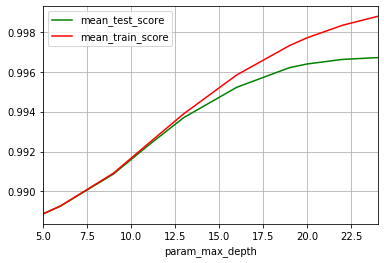

In [198]:
model_cv_results.set_index('param_max_depth')['mean_test_score'].plot(color='g',legend=True)
model_cv_results.set_index('param_max_depth')['mean_train_score'].plot(color='r' , legend=True)
plt.grid(True)
plt.show()

# XGBoost

In [199]:
import xgboost as xgb

In [200]:
dtrain = xgb.DMatrix(X_train,y_train)
dvalidate = xgb.DMatrix(X_val[X_train.columns],y_val)
params = {'eta' : 1,'max_depth' : 5,'objecive' : 'reg:linear'}
model_xg = xgb.train(params, dtrain , 5)
y_pred_xg = model_xg.predict(dvalidate)
y_pred_xg = np.exp(y_pred_xg)-1

C:\Users\ashok\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [201]:
y_pred_xg

array([-5.0068319e-02, -1.1340499e-02,  6.4891250e+03, ...,
        1.2644985e+04,  7.4894692e+03,  6.6371123e+03], dtype=float32)

In [202]:
#rmspe(y_val,y_pred_xg)

In [203]:
test_pred = dt.predict(test_model_open[X_train.columns])
test_pred_inv = np.exp(test_pred)-1

In [204]:
test_pred_inv

array([ 7413.15347714,  6098.66222666,  7210.06059065, ...,
        5790.9428882 , 21658.22306126,  5029.38708966])

In [207]:
submission1 = pd.DataFrame({ "id" : test_model_open.index , 'Sales' : test_pred_inv})
submission1['Sales'] = submission1['Sales'].astype(int)
submission1['id']= submission1.index
submission1['id'] = submission1['id']+1
submission1.head()

,id,Sales
0,1,7413
1,2,6098
2,3,7210
3,4,6789
4,5,6889


In [208]:
submission1.shape

(35104, 2)

In [209]:
submission1

,id,Sales
0,1,7413
1,2,6098
2,3,7210
3,4,6789
4,5,6889
...,...,...
35099,35100,4341
35100,35101,8282
35101,35102,5790
35102,35103,21658


In [210]:
submission1.to_csv('sumbission1.csv',index=False)